<a href="https://colab.research.google.com/github/Nishchay-29/Credit-card-fraud-detection/blob/main/Credit_card_fraud_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('creditcard.csv')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data.shape

(261408, 31)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,261408.0,88468.339959,44336.878816,0.000000,51542.000000,79412.000000,131341.000000,160001.000000
V1,261408.0,-0.019714,1.957101,-56.407510,-0.927896,0.010702,1.282537,2.454930
V2,261408.0,-0.016479,1.660061,-72.715728,-0.608960,0.059551,0.785382,22.057729
V3,261408.0,0.065663,1.508726,-33.680984,-0.780364,0.259821,1.076735,9.382558
V4,261408.0,0.015061,1.415063,-5.683171,-0.842316,0.002506,0.776174,16.875344
V5,261408.0,-0.025850,1.369857,-42.147898,-0.717028,-0.082466,0.580853,34.801666
V6,261408.0,0.011847,1.324961,-26.160506,-0.755623,-0.258379,0.413905,22.529298
V7,261408.0,-0.011680,1.222973,-43.557242,-0.562317,0.026516,0.554617,36.877368
V8,261408.0,0.000777,1.194840,-73.216718,-0.204268,0.026326,0.328703,20.007208
V9,261408.0,0.000250,1.107244,-13.434066,-0.651622,-0.055565,0.604144,15.594995


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261408 entries, 0 to 261407
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    261408 non-null  float64
 1   V1      261408 non-null  float64
 2   V2      261408 non-null  float64
 3   V3      261408 non-null  float64
 4   V4      261408 non-null  float64
 5   V5      261408 non-null  float64
 6   V6      261408 non-null  float64
 7   V7      261408 non-null  float64
 8   V8      261408 non-null  float64
 9   V9      261408 non-null  float64
 10  V10     261408 non-null  float64
 11  V11     261408 non-null  float64
 12  V12     261407 non-null  float64
 13  V13     261407 non-null  float64
 14  V14     261407 non-null  float64
 15  V15     261407 non-null  float64
 16  V16     261407 non-null  float64
 17  V17     261407 non-null  float64
 18  V18     261407 non-null  float64
 19  V19     261407 non-null  float64
 20  V20     261407 non-null  float64
 21  V21     26

In [7]:
fraud = data[data.Class == 1]
valid = data[data.Class == 0]
outlierFraction = len(fraud) / float(len(valid))
outlierFraction

0.0018088796060321535

In [8]:
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Fraud Cases: 472
Valid Transactions: 260935


In [9]:
fraud.Amount.describe()

count     472.000000
mean      122.840297
std       259.787832
min         0.000000
25%         1.000000
50%         9.015000
75%       105.080000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
valid.Amount.describe()

count    260935.000000
mean         89.887650
std         249.237334
min           0.000000
25%           5.990000
50%          22.820000
75%          79.000000
max       19656.530000
Name: Amount, dtype: float64

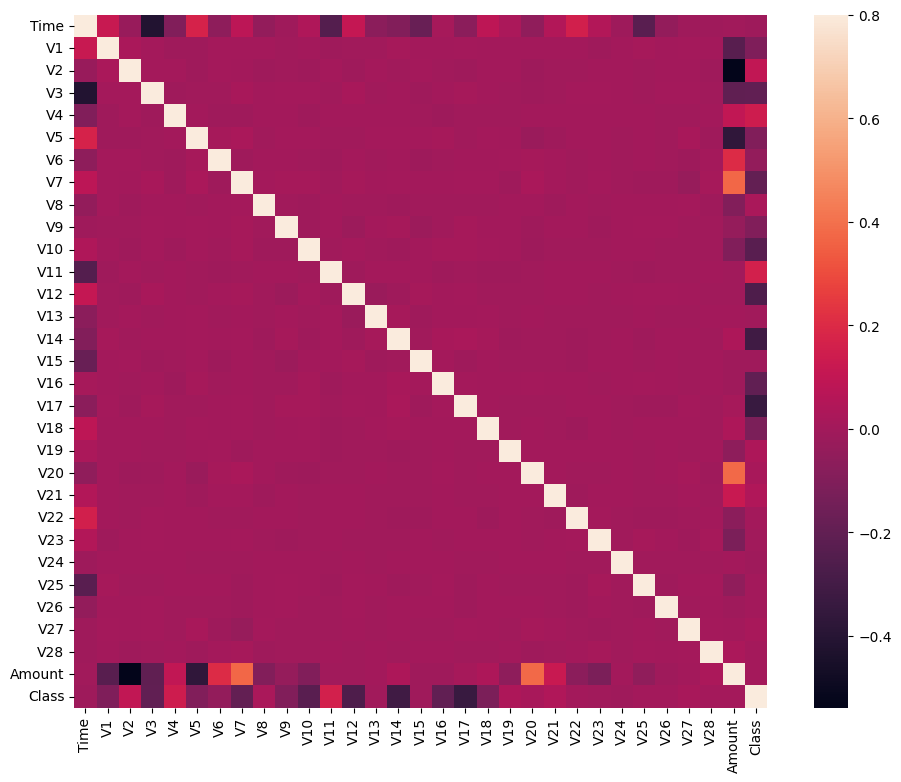

In [11]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [28]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
data = data.dropna()

In [29]:
X = data.drop(['Class'], axis = 1)
y = data.Class
X.shape, y.shape

((261407, 30), (261407,))

In [30]:
X_data = X.values
y_data = y.values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .2,
                                                   random_state = 42)

In [32]:
rfc = RandomForestClassifier()

In [33]:
X_train

array([[ 1.49985000e+05, -9.41572787e-01,  1.06068530e+00, ...,
        -3.28323622e-01, -1.90010196e-01,  2.00000000e+00],
       [ 6.61990000e+04,  1.45179558e+00, -1.05233605e+00, ...,
         3.29037928e-02,  1.51484374e-02,  6.45000000e+01],
       [ 1.25421000e+05,  2.09192976e+00,  7.03071121e-02, ...,
        -3.86772900e-03, -5.91122878e-02,  1.00000000e+00],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01,  3.94000000e+00],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01,  1.00000000e+00],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  1.13000000e+02]])

In [34]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
pred = rfc.predict(X_test)

In [37]:
acc = accuracy_score(y_test, pred)
acc

0.9996365862055775

In [38]:
prec = precision_score(y_test, pred)
prec

0.9054054054054054

In [39]:
rec = recall_score(y_test, pred)
rec

0.8481012658227848

In [40]:
f1 = f1_score(y_test, pred)
f1

0.8758169934640523

In [41]:
mcc = matthews_corrcoef(y_test, pred)
mcc

0.8761045358600771

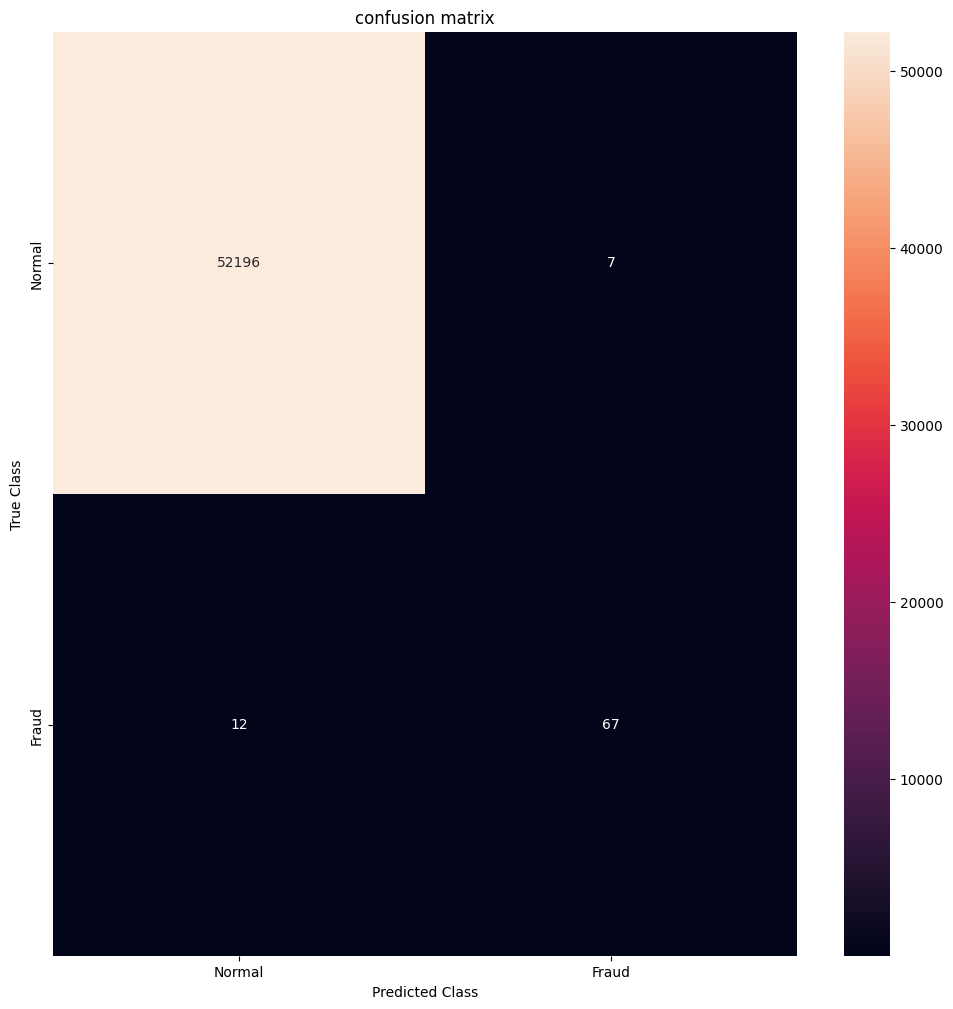

In [42]:
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (12, 12))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True,
           fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()